In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [150]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [151]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330393 entries, 0 to 1330392
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1330393 non-null  int64  
 1   kWh       1330393 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 20.3 MB


In [152]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1330388    0.11
1330389    0.11
1330390    0.11
1330391    0.13
1330392    0.13
Name: kWh, Length: 1330393, dtype: float64

In [153]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1330388    0.11
1330389    0.11
1330390    0.11
1330391    0.13
1330392    0.13
Name: kWh, Length: 1330393, dtype: float64

In [154]:
l=len(conso_data)-1
l

1330392

In [155]:
conso_data['sec']=conso_data['Interval']/1000


In [156]:
conso_data['Wh']=3600000/conso_data['Interval']


In [157]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [158]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330393 entries, 0 to 1330392
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1330393 non-null  int64  
 1   kWh        1330393 non-null  float64
 2   sec        1330393 non-null  float64
 3   Wh         1330393 non-null  float64
 4   cumul(ms)  1330393 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 50.8 MB


In [159]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1330388,32603,0.11,32.603,110.419287,31342413397
1330389,32782,0.11,32.782,109.816363,31342446179
1330390,32589,0.11,32.589,110.466722,31342478768
1330391,27916,0.13,27.916,128.958303,31342506684
1330392,26979,0.13,26.979,133.437118,31342533663


In [160]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

31342533663000

In [161]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 13, 43, 656857)

In [162]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [163]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [164]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [165]:
conso_data['dates']

0         2023-08-21 19:14:05.590857
1         2023-08-21 19:14:27.448857
2         2023-08-21 19:14:49.449857
3         2023-08-21 19:15:11.377857
4         2023-08-21 19:15:33.268857
                     ...            
1330388   2024-08-18 13:27:17.053857
1330389   2024-08-18 13:27:49.835857
1330390   2024-08-18 13:28:22.424857
1330391   2024-08-18 13:28:50.340857
1330392   2024-08-18 13:29:17.319857
Name: dates, Length: 1330393, dtype: datetime64[ns]

In [166]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:14:05.590857,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:14:27.448857,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:14:49.449857,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:15:11.377857,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:15:33.268857,21/08/23
...,...,...,...,...,...,...,...
1330388,32603,0.11,32.603,110.419287,31342413397,2024-08-18 13:27:17.053857,18/08/24
1330389,32782,0.11,32.782,109.816363,31342446179,2024-08-18 13:27:49.835857,18/08/24
1330390,32589,0.11,32.589,110.466722,31342478768,2024-08-18 13:28:22.424857,18/08/24
1330391,27916,0.13,27.916,128.958303,31342506684,2024-08-18 13:28:50.340857,18/08/24


In [167]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
date = now.day
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, date, month, year


('18/08/24', 18, 8, 2024)

In [168]:
here = now.strftime('%H:%M:%S')
here

'13:29:40'

In [169]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [170]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2219 entries, 1328174 to 1330392
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2219 non-null   int64         
 1   kWh        2219 non-null   float64       
 2   sec        2219 non-null   float64       
 3   Wh         2219 non-null   float64       
 4   cumul(ms)  2219 non-null   int64         
 5   dates      2219 non-null   datetime64[ns]
 6   days       2219 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 138.7+ KB


In [171]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [172]:
data = list(df_grp['kWh'])
print(data)


[0.819, 3.699, 4.23, 3.674, 4.19, 4.602, 3.529, 3.417, 3.514, 3.69, 3.755, 3.812, 4.249, 3.792, 3.485, 3.635, 3.32, 3.383, 4.278, 4.009, 4.043, 3.931, 3.447, 4.444, 3.755, 3.76, 4.33, 4.703, 3.82, 3.223, 3.179, 3.989, 3.683, 3.157, 3.802, 4.128, 3.766, 3.578, 4.771, 4.196, 4.539, 3.775, 3.409, 4.305, 3.879, 3.857, 3.441, 4.08, 3.657, 3.399, 4.136, 3.384, 3.884, 3.835, 3.637, 3.759, 4.246, 3.299, 3.875, 2.986, 2.055, 2.042, 2.447, 4.088, 3.72, 4.331, 3.612, 3.927, 3.741, 3.904, 4.003, 4.105, 3.655, 3.155, 3.805, 3.509, 3.625, 3.709, 3.684, 3.242, 3.865, 3.248, 3.795, 3.612, 4.078, 3.564, 3.385, 3.818, 4.065, 4.328, 4.136, 3.998, 4.235, 3.742, 3.929, 3.86, 3.915, 3.737, 4.05, 4.346, 3.885, 3.505, 3.683, 3.667, 3.349, 3.846, 4.0, 4.1, 3.476, 4.176, 3.604, 4.063, 4.544, 3.679, 3.435, 3.579, 4.154, 3.702, 4.088, 3.98, 3.746, 3.591, 5.126, 3.702, 3.765, 4.288, 4.107, 4.698, 4.407, 3.994, 3.768, 4.358, 4.687, 4.194, 4.793, 4.315, 3.731, 4.171, 3.701, 3.652, 3.531, 3.936, 3.681, 3.785, 3.58, 3

In [173]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [174]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [175]:
def conso_byhour(day):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    

In [176]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.305775
dtype: float64

In [177]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.654926
dtype: float64

In [178]:
last=df_grp.iloc[-1]['kWh']
last

2.219

In [179]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2219 entries, 1328174 to 1330392
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2219 non-null   int64         
 1   kWh        2219 non-null   float64       
 2   sec        2219 non-null   float64       
 3   Wh         2219 non-null   float64       
 4   cumul(ms)  2219 non-null   int64         
 5   dates      2219 non-null   datetime64[ns]
 6   days       2219 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 138.7+ KB


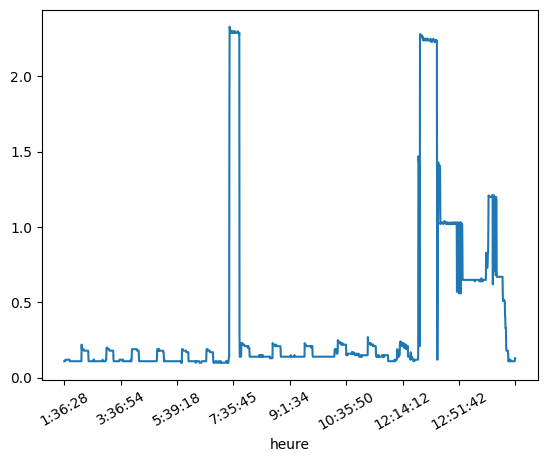

In [180]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);

In [181]:
conso_day['heure']


1328174      0:0:21
1328175      0:0:49
1328176      0:1:17
1328177      0:1:44
1328178      0:2:13
             ...   
1330388    13:27:17
1330389    13:27:49
1330390    13:28:22
1330391    13:28:50
1330392    13:29:17
Name: heure, Length: 2219, dtype: object

In [182]:
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
list(df_byhour)

[('0:0:21',
              days   kWh
  heure                 
  0:0:21  18/08/24  0.12),
 ('0:0:49',
              days   kWh
  heure                 
  0:0:49  18/08/24  0.13),
 ('0:1:17',
              days   kWh
  heure                 
  0:1:17  18/08/24  0.13),
 ('0:1:44',
              days   kWh
  heure                 
  0:1:44  18/08/24  0.13),
 ('0:2:13',
              days   kWh
  heure                 
  0:2:13  18/08/24  0.13),
 ('0:2:41',
              days   kWh
  heure                 
  0:2:41  18/08/24  0.13),
 ('0:3:10',
              days   kWh
  heure                 
  0:3:10  18/08/24  0.13),
 ('0:3:38',
              days   kWh
  heure                 
  0:3:38  18/08/24  0.13),
 ('0:4:7',
             days   kWh
  heure                
  0:4:7  18/08/24  0.13),
 ('0:4:35',
              days   kWh
  heure                 
  0:4:35  18/08/24  0.13),
 ('0:5:4',
             days   kWh
  heure                
  0:5:4  18/08/24  0.13),
 ('0:5:32',
              day

In [183]:
kwh_byhour = list(df_byhour['kWh'])
kwh_byhour

[('0:0:21',
  heure
  0:0:21    0.12
  Name: kWh, dtype: float64),
 ('0:0:49',
  heure
  0:0:49    0.13
  Name: kWh, dtype: float64),
 ('0:1:17',
  heure
  0:1:17    0.13
  Name: kWh, dtype: float64),
 ('0:1:44',
  heure
  0:1:44    0.13
  Name: kWh, dtype: float64),
 ('0:2:13',
  heure
  0:2:13    0.13
  Name: kWh, dtype: float64),
 ('0:2:41',
  heure
  0:2:41    0.13
  Name: kWh, dtype: float64),
 ('0:3:10',
  heure
  0:3:10    0.13
  Name: kWh, dtype: float64),
 ('0:3:38',
  heure
  0:3:38    0.13
  Name: kWh, dtype: float64),
 ('0:4:7',
  heure
  0:4:7    0.13
  Name: kWh, dtype: float64),
 ('0:4:35',
  heure
  0:4:35    0.13
  Name: kWh, dtype: float64),
 ('0:5:4',
  heure
  0:5:4    0.13
  Name: kWh, dtype: float64),
 ('0:5:32',
  heure
  0:5:32    0.13
  Name: kWh, dtype: float64),
 ('0:6:1',
  heure
  0:6:1    0.13
  Name: kWh, dtype: float64),
 ('0:6:30',
  heure
  0:6:30    0.12
  Name: kWh, dtype: float64),
 ('0:6:58',
  heure
  0:6:58    0.13
  Name: kWh, dtype: float64),
 

In [184]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:21,29595,0.12,29.595,121.642169,31293997996,2024-08-18 00:00:21.652857,18/08/24
0:0:49,28243,0.13,28.243,127.465213,31294026239,2024-08-18 00:00:49.895857,18/08/24
0:1:17,27281,0.13,27.281,131.959972,31294053520,2024-08-18 00:01:17.176857,18/08/24
0:1:44,27593,0.13,27.593,130.467872,31294081113,2024-08-18 00:01:44.769857,18/08/24
0:2:13,28476,0.13,28.476,126.422250,31294109589,2024-08-18 00:02:13.245857,18/08/24
...,...,...,...,...,...,...,...
13:27:17,32603,0.11,32.603,110.419287,31342413397,2024-08-18 13:27:17.053857,18/08/24
13:27:49,32782,0.11,32.782,109.816363,31342446179,2024-08-18 13:27:49.835857,18/08/24
13:28:22,32589,0.11,32.589,110.466722,31342478768,2024-08-18 13:28:22.424857,18/08/24


In [185]:
# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']

In [186]:
df.iloc[0].dates

Timestamp('2024-08-18 00:00:21.652857')

In [187]:
df.dates.dt.time

heure
0:0:21      00:00:21.652857
0:0:49      00:00:49.895857
0:1:17      00:01:17.176857
0:1:44      00:01:44.769857
0:2:13      00:02:13.245857
                 ...       
13:27:17    13:27:17.053857
13:27:49    13:27:49.835857
13:28:22    13:28:22.424857
13:28:50    13:28:50.340857
13:29:17    13:29:17.319857
Name: dates, Length: 2219, dtype: object

In [188]:
def period(p=1):
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [189]:
tranches = len(df)//1000
tranches+1

3

In [190]:
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)

2024-08-18 00:00:21.652857	2024-08-18 07:37:56.553857	7h 37m 34s 	1000
2024-08-18 07:37:56.553857	2024-08-18 12:54:01.510857	5h 16m 4s 	2000
2024-08-18 12:54:01.510857	2024-08-18 13:29:17.319857	0h 35m 15s 	219


In [191]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('13:29:40', 2.219, 2219)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2219 entries, 0:0:21 to 13:29:17
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2219 non-null   int64         
 1   kWh        2219 non-null   float64       
 2   sec        2219 non-null   float64       
 3   Wh         2219 non-null   float64       
 4   cumul(ms)  2219 non-null   int64         
 5   dates      2219 non-null   datetime64[ns]
 6   days       2219 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 203.2+ KB


In [193]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)

In [194]:
df_grp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 21/08/23 to 18/08/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     364 non-null    float64
dtypes: float64(1)
memory usage: 5.7+ KB


In [195]:
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')

In [196]:
df_grp.tail(7)

,kWh
days,
12/08/24,4.370
13/08/24,4.362
14/08/24,3.592
15/08/24,4.014
16/08/24,3.904
17/08/24,3.944
18/08/24,2.219


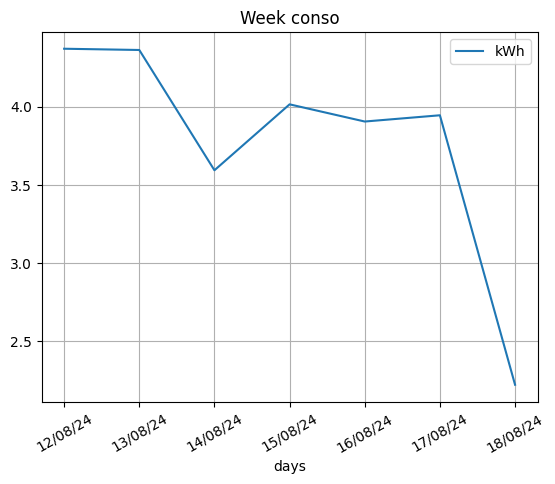

In [197]:
# last week conso
df_grp.tail(7).plot(grid=True)
plt.title('Week conso')
plt.xticks(rotation=30);

In [198]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [199]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


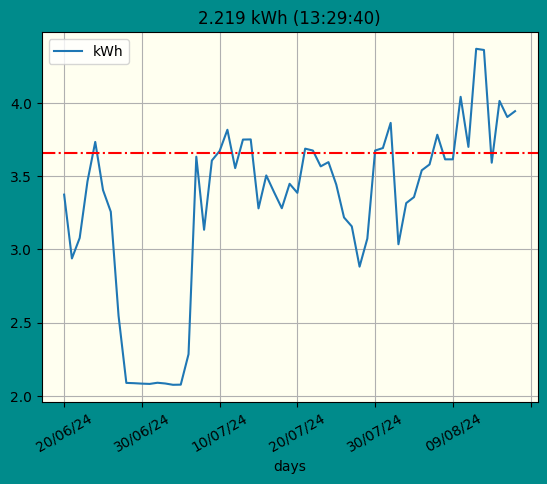

In [200]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [201]:
df_grp.mean()

kWh    3.654926
dtype: float64

In [202]:
#df_grp.head()
df_grp.tail(14)

,kWh
days,
05/08/24,3.540
06/08/24,3.580
07/08/24,3.783
08/08/24,3.615
09/08/24,3.615
10/08/24,4.042
11/08/24,3.700
12/08/24,4.370
13/08/24,4.362


In [203]:
df_grp

,kWh
days,
21/08/23,0.819
22/08/23,3.699
23/08/23,4.230
24/08/23,3.674
25/08/23,4.190
...,...
14/08/24,3.592
15/08/24,4.014
16/08/24,3.904


In [204]:
df_grp.tail(100).mean()

kWh    3.38703
dtype: float64

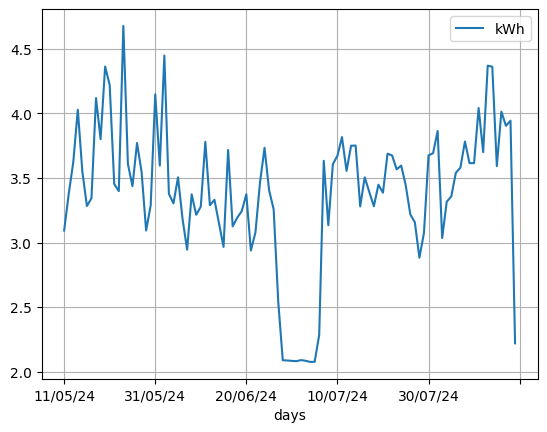

In [205]:
df_grp.tail(100).plot()
plt.grid()

In [206]:
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()


,kWh
count,30.000000
mean,3.604467
std,0.351527
min,2.882000
25%,3.400250
50%,3.605500
75%,3.762250
max,4.370000


In [207]:
month = df_grp.iloc[-31:-1]['kWh']
print(month.idxmax(), max(month))
print(month.idxmin(), min(month))

12/08/24 4.37
28/07/24 2.882


In [208]:
day

'18/08/24'

In [209]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1328174,29595,0.12,29.595,121.642169,31293997996,2024-08-18 00:00:21.652857,18/08/24,0:0:21
1328175,28243,0.13,28.243,127.465213,31294026239,2024-08-18 00:00:49.895857,18/08/24,0:0:49
1328176,27281,0.13,27.281,131.959972,31294053520,2024-08-18 00:01:17.176857,18/08/24,0:1:17
1328177,27593,0.13,27.593,130.467872,31294081113,2024-08-18 00:01:44.769857,18/08/24,0:1:44
1328178,28476,0.13,28.476,126.422250,31294109589,2024-08-18 00:02:13.245857,18/08/24,0:2:13
...,...,...,...,...,...,...,...,...
1330388,32603,0.11,32.603,110.419287,31342413397,2024-08-18 13:27:17.053857,18/08/24,13:27:17
1330389,32782,0.11,32.782,109.816363,31342446179,2024-08-18 13:27:49.835857,18/08/24,13:27:49
1330390,32589,0.11,32.589,110.466722,31342478768,2024-08-18 13:28:22.424857,18/08/24,13:28:22
1330391,27916,0.13,27.916,128.958303,31342506684,2024-08-18 13:28:50.340857,18/08/24,13:28:50


In [210]:
#add hours column
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2219 entries, 1328174 to 1330392
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2219 non-null   int64         
 1   kWh        2219 non-null   float64       
 2   sec        2219 non-null   float64       
 3   Wh         2219 non-null   float64       
 4   cumul(ms)  2219 non-null   int64         
 5   dates      2219 non-null   datetime64[ns]
 6   days       2219 non-null   object        
 7   heure      2219 non-null   object        
 8   hours      2219 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 173.4+ KB


In [211]:
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)

[('00',
          hours   kWh
  1328174    00  0.12
  1328175    00  0.13
  1328176    00  0.13
  1328177    00  0.13
  1328178    00  0.13
  ...       ...   ...
  1328306    00  0.12
  1328307    00  0.12
  1328308    00  0.12
  1328309    00  0.12
  1328310    00  0.12
  
  [137 rows x 2 columns]),
 ('01',
          hours   kWh
  1328311    01  0.12
  1328312    01  0.12
  1328313    01  0.12
  1328314    01  0.12
  1328315    01  0.12
  ...       ...   ...
  1328433    01  0.11
  1328434    01  0.11
  1328435    01  0.11
  1328436    01  0.11
  1328437    01  0.11
  
  [127 rows x 2 columns]),
 ('02',
          hours   kWh
  1328438    02  0.11
  1328439    02  0.11
  1328440    02  0.11
  1328441    02  0.11
  1328442    02  0.11
  ...       ...   ...
  1328557    02  0.11
  1328558    02  0.11
  1328559    02  0.11
  1328560    02  0.11
  1328561    02  0.11
  
  [124 rows x 2 columns]),
 ('03',
          hours   kWh
  1328562    03  0.11
  1328563    03  0.12
  1328564    03  0.1

In [212]:
groupedbyhour.count()

,kWh
hours,
00,137
01,127
02,124
03,124
04,128
05,128
06,120
07,175
08,153


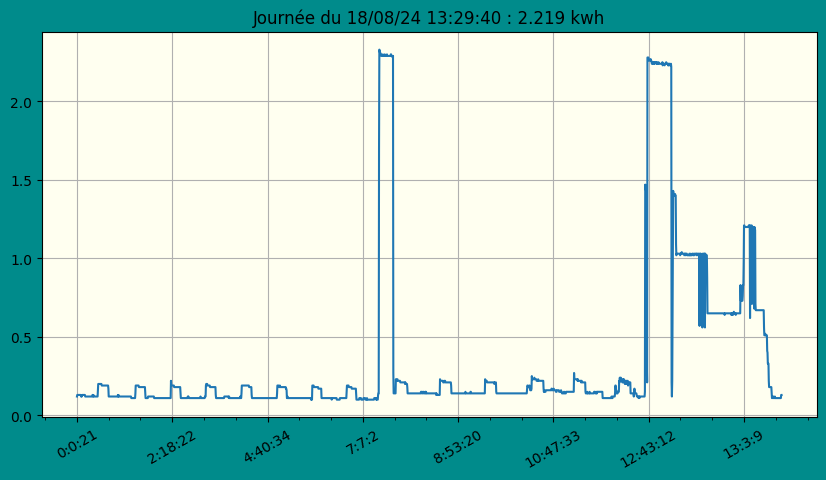

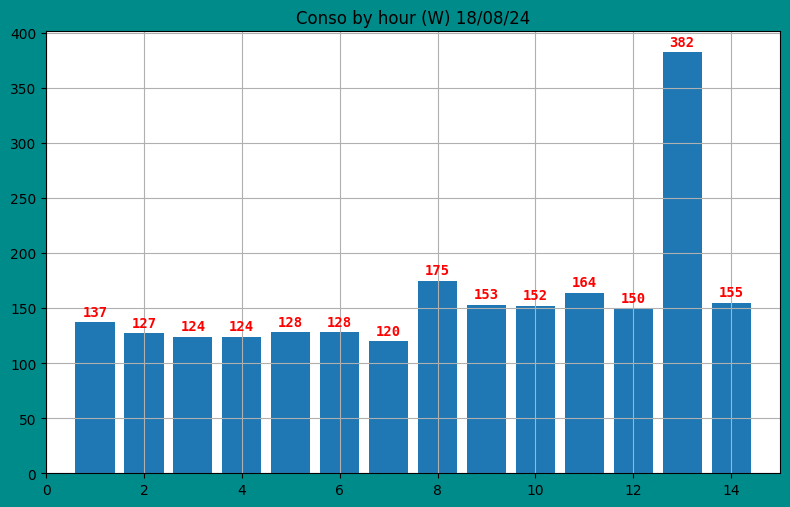

In [213]:
show(day,bgcolor='ivory')
data = groupedbyhour.count().kWh
#len(groupedbyhour)
x = np.arange(1,len(groupedbyhour)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {day}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [214]:
import os
os.listdir(path='.')

['.git',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipynb',
 'date_formatter_pandas.ipynb',
 'decimals

In [215]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [216]:
#conso_byhour(day)

In [217]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

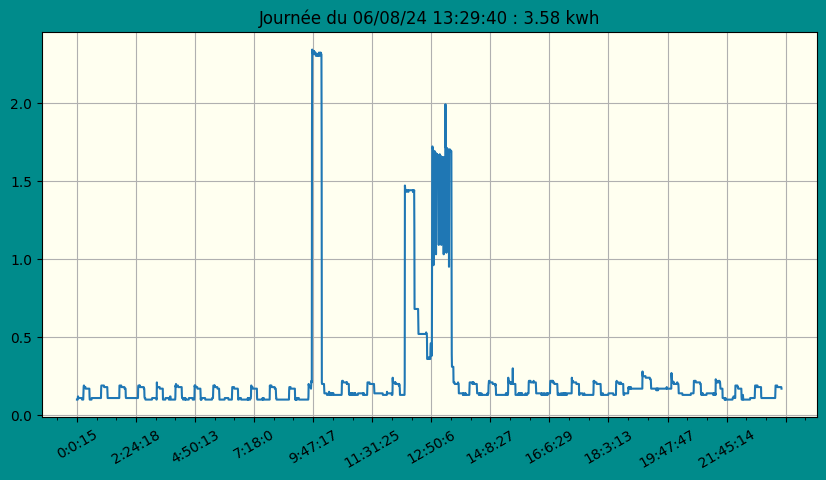

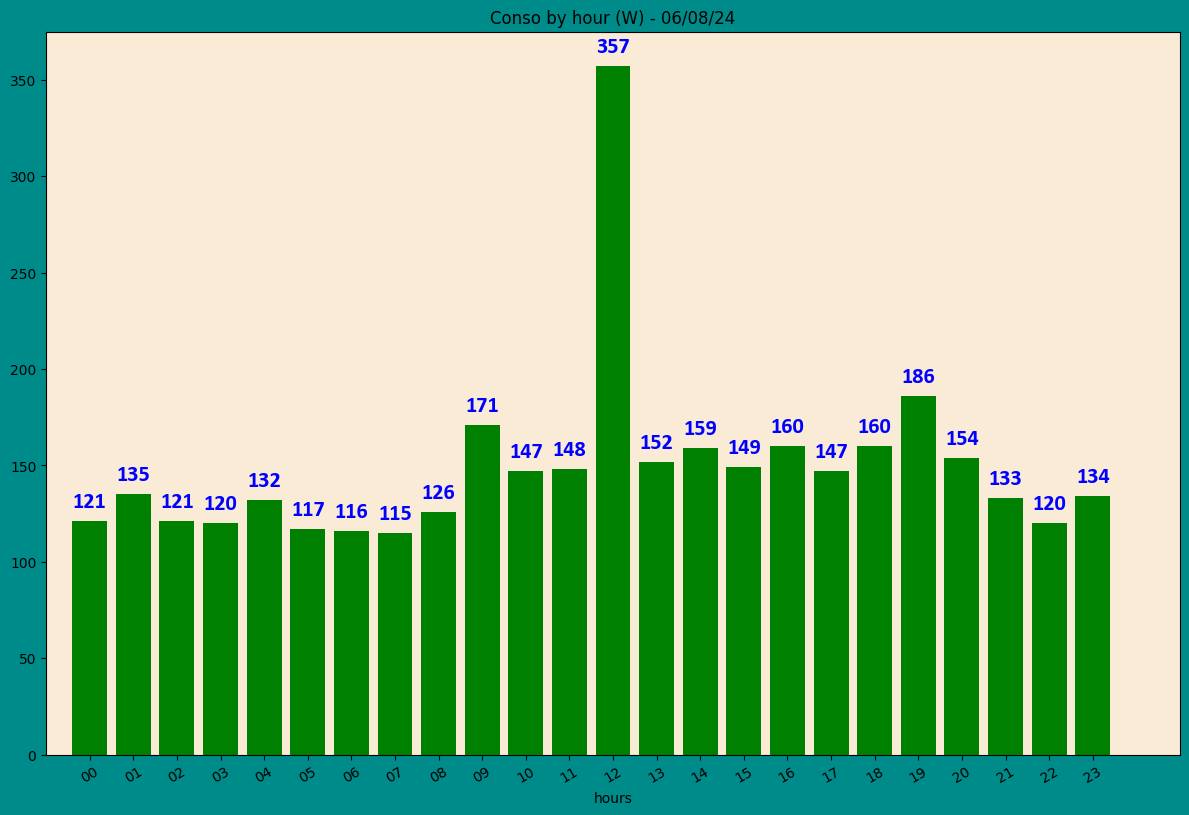

In [218]:
# plot any day
day = '06/08/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [219]:
month

days
19/07/24    3.448
20/07/24    3.386
21/07/24    3.688
22/07/24    3.675
23/07/24    3.567
24/07/24    3.596
25/07/24    3.443
26/07/24    3.218
27/07/24    3.157
28/07/24    2.882
29/07/24    3.074
30/07/24    3.675
31/07/24    3.692
01/08/24    3.864
02/08/24    3.035
03/08/24    3.316
04/08/24    3.357
05/08/24    3.540
06/08/24    3.580
07/08/24    3.783
08/08/24    3.615
09/08/24    3.615
10/08/24    4.042
11/08/24    3.700
12/08/24    4.370
13/08/24    4.362
14/08/24    3.592
15/08/24    4.014
16/08/24    3.904
17/08/24    3.944
Name: kWh, dtype: float64

In [220]:
month.idxmax()

'12/08/24'

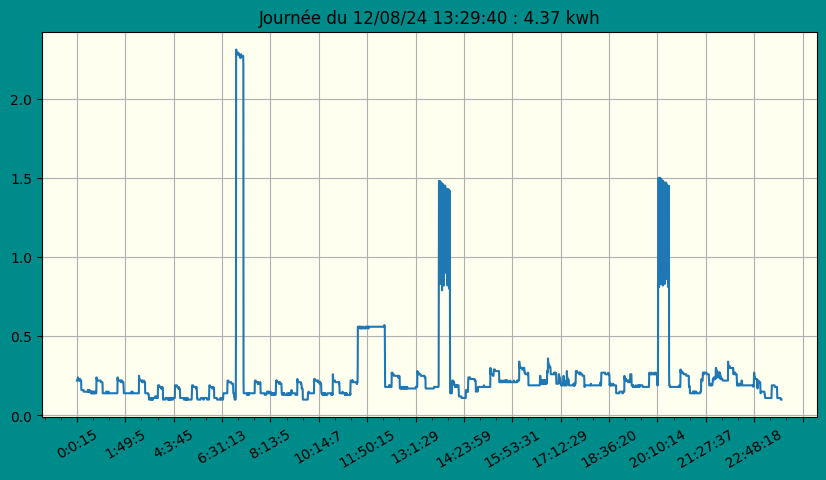

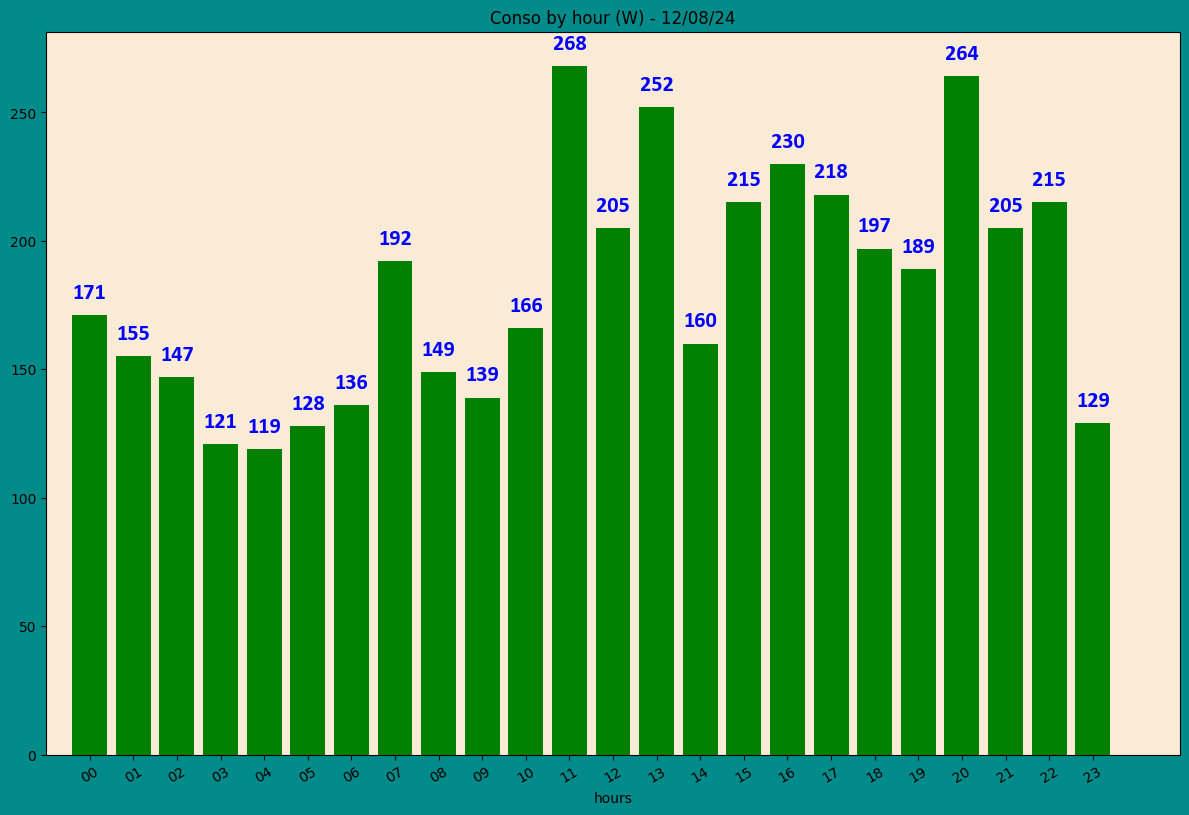

In [221]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [222]:
filename='conso_data.csv'
#conso_data.to_csv(filename)